In [1]:
import numpy as np
import matplotlib.pyplot as plt

def square(amp,offset,period,density,start,end):
    length = (end-start)*density
    y = np.zeros(length,float)
    y.fill(offset)
    for x in range(length):
        x -= start
        if (x/density)%period < period/2:
            y[x] += amp
        else:
            y[x] -= amp
    x = np.linspace(start,end,(end-start)*density)
    return x,y

def integrate(x,y):
    length = len(x)-1
    total = 0
    for i in range(length):
        total += (x[i+1]-x[i]) * (y[i]+y[i+1])
    return total/2



-2.7809859839636073e-16


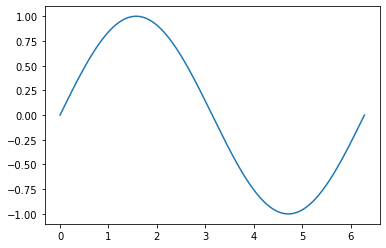

In [12]:
x1, y1 = np.loadtxt(r"C:\Users\tonyk\OneDrive - Imperial College London\Uni\Year 2\Computing and Laboratory\Lab\Waves\Task1.3_Semicircle_high.txt", 
                    unpack=True, skiprows=1)

x1 = np.linspace(0,2*np.pi,10000)
y1 = np.sin(x1)
print(integrate(x1,y1))

plt.plot(x1,y1)
plt.show()

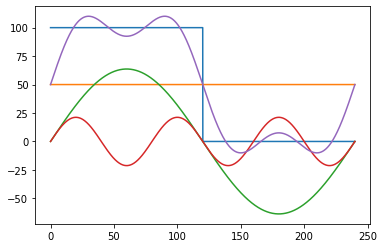

In [13]:
sq = square(50,50,240,100,0,240)
plt.plot(*sq)

x = sq[0]
length = len(x)

n1 = np.full(length, 50)
n2 = 200/np.pi*np.sin(2*np.pi/240*x)
n3 = 200/np.pi/3*np.sin(2*np.pi/80*x)

plt.plot(x,n1)
plt.plot(x,n2)
plt.plot(x,n3)
plt.plot(x,n1+n2+n3)


11 109.0650922021701
27 108.97025787164223
77 108.95172681017203
215 108.94934399232285
599 108.94903351909456
1669 108.94879263228728
4641 108.94732928118636
12915 108.92401253569818
35939 108.83639236344818
100001 107.42019369122838


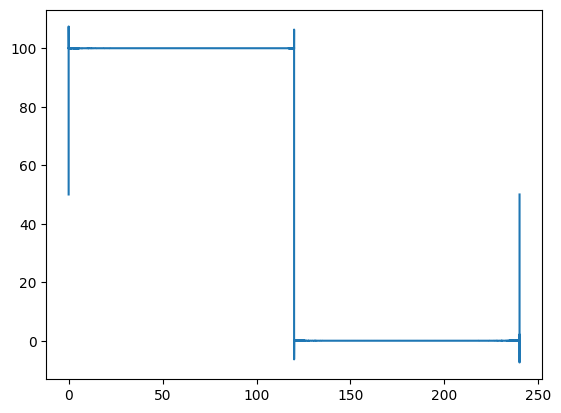

In [38]:
sq = square(50,50,240,1000,0,240)
#plt.plot(*sq)

x0 = sq[0]
length = len(x0)

n0 = np.full(length, 50.)
def gen_sin(n):
    global x0
    return 200/np.pi/n*np.sin(2*np.pi/240*n*x0)

sin = n0
cumalative = n0

vect_int = np.vectorize(int)

max_power = 5

num = vect_int(np.logspace(1,max_power,10)/2)*2+1

for i in range(1,int(10**max_power)+100,2):
    cumalative += gen_sin(i)
    if i in num:
        print(i,max(cumalative))
plt.plot(x0,cumalative)





11 109.06509220303937
27 108.97025797647551
77 108.95172685020844
215 108.94934444698136
599 108.94903351995391
1669 108.94899282048341
4641 108.94898793435088
12915 108.94893830961463
35939 108.94843554400832
100001 108.94898720443236


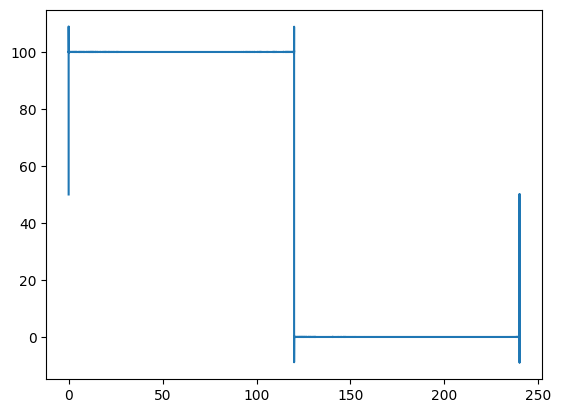

In [40]:
sq = square(50,50,240,10000,0,240)
#plt.plot(*sq)

x0 = sq[0]
length = len(x0)

n0 = np.full(length, 50.)
def gen_sin(n):
    global x0
    return 200/np.pi/n*np.sin(2*np.pi/240*n*x0)

sin = n0
cumalative = n0

vect_int = np.vectorize(int)

max_power = 5

num = vect_int(np.logspace(1,max_power,10)/2)*2+1

for i in range(1,int(10**max_power)+100,2):
    cumalative += gen_sin(i)
    if i in num:
        print(i,max(cumalative))
plt.plot(x0,cumalative)





11 50.00999499998744
35 50.02998499864831
129 50.108279097515286
465 50.388135962125894
1669 51.39082328335114
5995 54.987343457946764
21545 67.63212123239981
77427 101.47412611134153
278255 108.94897142607122
1000001 108.94812074888735


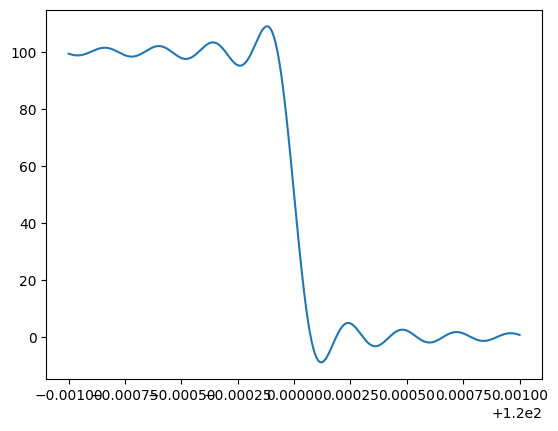

In [53]:
sq = square(50,50,240,1000000,0,240)
#plt.plot(*sq)

x0 = sq[0]
x0 = x0[int(len(x0)/2-1000):int(len(x0)/2)+1000]
length = len(x0)

n0 = np.full(length, 50.)
def gen_sin(n):
    global x0
    return 200/np.pi/n*np.sin(2*np.pi/240*n*x0)

sin = n0
cumalative = n0

vect_int = np.vectorize(int)

max_power = 6

num = vect_int(np.logspace(1,max_power,10)/2)*2+1

for i in range(1,int(10**max_power)+100,2):
    cumalative += gen_sin(i)
    if i in num:
        print(i,max(cumalative))
plt.plot(x0,cumalative)



